In [1]:
import numpy as np
from numpy.fft import fft
import pydub
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import bisect
%matplotlib inline

In [2]:
song = Path('indonesia_baru.ogg')
a = pydub.AudioSegment.from_ogg(song)
y = np.array(a.get_array_of_samples())

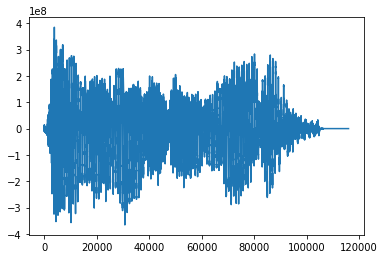

In [3]:
plt.plot(y)
plt.show()

In [4]:
a.frame_rate

48000

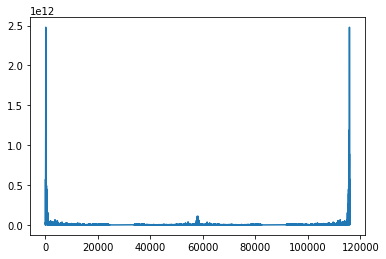

In [5]:
yf = fft(y)
plt.plot(np.abs(yf))
plt.show()

In [6]:
f = []
w = 128
for i in range(round(len(y)/w)-1):
    f.append(y[i*w:(i+1)*w-1])
len(f)

905

In [26]:
c=[]
for j in range(len(f)):
    c.append(np.corrcoef(f[36],f[j]))

In [27]:
result = []
for i in range(len(c)):
    result.append(c[i][0][1])
sorted(result)

[-0.8843114444756539,
 -0.8733216584450553,
 -0.8682160643861945,
 -0.867166888319549,
 -0.8565400555499182,
 -0.8475721759662775,
 -0.8460063539785092,
 -0.8415687951944277,
 -0.841359182912412,
 -0.8383004023122365,
 -0.8265194013630647,
 -0.8201652966569863,
 -0.8196659882341278,
 -0.8189164985210311,
 -0.818711442428315,
 -0.816407227541543,
 -0.8154026708159955,
 -0.8150097160390836,
 -0.8103551086311639,
 -0.8068144165039521,
 -0.8063936497847213,
 -0.8049362693360598,
 -0.8043634988474012,
 -0.803266139882118,
 -0.8014274298955805,
 -0.7980770059352611,
 -0.796547365571795,
 -0.7946468897393064,
 -0.7861940314688538,
 -0.7819470160490367,
 -0.7809669024202119,
 -0.7805780581474644,
 -0.7766931242191836,
 -0.7763675183364516,
 -0.7750820841667089,
 -0.7717473421617702,
 -0.770903055979415,
 -0.7699977607369418,
 -0.7651568332297166,
 -0.7640790524654052,
 -0.7635873678429735,
 -0.7595221188387306,
 -0.7593291928292482,
 -0.758661414346073,
 -0.7585383053188836,
 -0.75799487766958

In [28]:
newresult = [x for x in result if str(x) != 'nan']

In [29]:
newresult_sorted = sorted(newresult)

In [30]:
def find_closest_index(a, x):
    i = bisect.bisect_left(a, x)
    if i > len(a):
        i = len(a) - 1
    elif i and a[i] - x > x - a[i - 1]:
        i = i - 1
    return (i, a[i])

In [39]:
print(find_closest_index(newresult_sorted, 0.6))

(674, 0.5993674490163222)


In [40]:
newresult_sorted[675]

0.6015571559793919

In [41]:
len(newresult_sorted)

836

In [46]:
for i in range(675,len(newresult_sorted)-1):
    print(newresult_sorted[i])

0.6015571559793919
0.6041559561559809
0.6089546593560219
0.6100112455300764
0.6107432829293421
0.6114514251007143
0.6160829965703638
0.6183700598936054
0.6188164495947391
0.6189245791291086
0.6191541084707209
0.6200819145785625
0.6223748870352533
0.6250013062340829
0.6278727412003631
0.634730985697761
0.6363279891578699
0.6365208794946285
0.6366035665389035
0.6393912794639308
0.6404511366240155
0.6408620897496533
0.6412089639773679
0.6413004283276664
0.64167247580038
0.6419584041339651
0.6421091716506486
0.6441984011296518
0.6493287922449205
0.6495185354727129
0.6511829918746895
0.6526123627268052
0.6534291448259574
0.6543728791563287
0.6587691539165309
0.6588466760353499
0.6600956034571399
0.6616100500081586
0.6637982160762113
0.6641207067055833
0.6657050787840445
0.6665942681796329
0.6692171364781588
0.6699039429987316
0.6706549666857984
0.670902097693912
0.6724392173156802
0.6726393595368676
0.6746051658560469
0.6772393694920175
0.6772452255136499
0.6783807591602975
0.67905465879183

In [81]:
r = []
for i in range(len(c)):
    if c[i][0][1] > 0.6 and c[i][0][1] < 1:
        r.append(i)

In [82]:
print(r)

[16, 28, 30, 32, 34, 40, 46, 52, 55, 58, 59, 68, 72, 75, 78, 81, 84, 85, 88, 92, 105, 108, 112, 115, 119, 122, 126, 129, 133, 140, 147, 150, 153, 154, 161, 174, 181, 186, 199, 201, 225, 228, 232, 235, 238, 239, 245, 248, 252, 255, 259, 262, 266, 267, 269, 273, 274, 276, 280, 283, 287, 290, 294, 301, 379, 381, 385, 387, 391, 397, 408, 410, 413, 421, 426, 428, 441, 444, 446, 448, 449, 452, 455, 460, 462, 465, 469, 476, 480, 487, 490, 494, 497, 498, 501, 504, 505, 508, 509, 511, 516, 523, 530, 532, 539, 546, 552, 556, 567, 569, 573, 578, 583, 584, 588, 589, 598, 599, 603, 604, 613, 614, 618, 619, 624, 626, 627, 634, 636, 643, 644, 646, 648, 650, 654, 659, 661, 663, 665, 667, 669, 673, 697, 699, 706, 713, 717, 729, 731, 733, 737, 739, 741, 743, 745, 749, 758, 766, 769, 799]


In [71]:
c[40][0][1]

0.6637982160762113

In [72]:
np.corrcoef(f[16],f[36])

array([[1.       , 0.6998401],
       [0.6998401, 1.       ]])

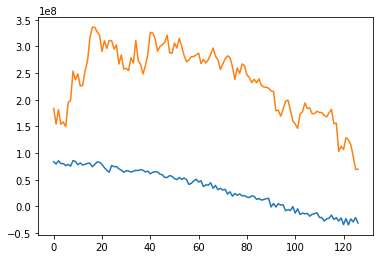

In [74]:
plt.plot(f[16])
plt.plot(f[36])

In [75]:
np.corrcoef(f[462],f[36])

array([[1.       , 0.7180157],
       [0.7180157, 1.       ]])

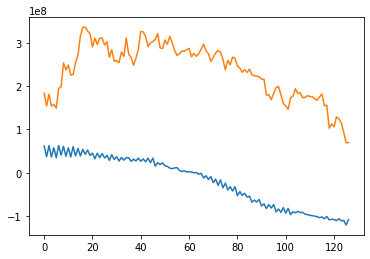

In [76]:
plt.plot(f[462])
plt.plot(f[36])

In [77]:
np.corrcoef(f[799],f[36])

array([[1.        , 0.74705134],
       [0.74705134, 1.        ]])

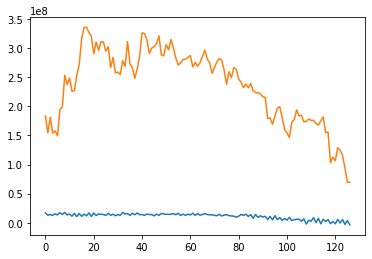

In [78]:
plt.plot(f[799])
plt.plot(f[36])

In [79]:
np.corrcoef(f[569],f[36])

array([[1.        , 0.64167248],
       [0.64167248, 1.        ]])

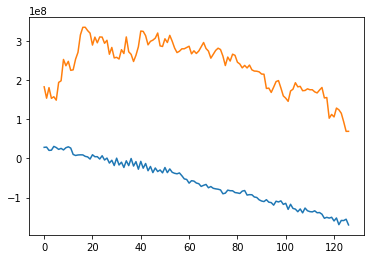

In [80]:
plt.plot(f[569])
plt.plot(f[36])